In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt
from importlib.metadata import version
import pixellib

(540, 960, 3) (1440, 1080, 3) (1280, 960, 3)


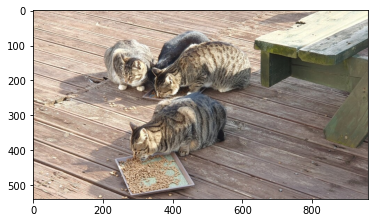

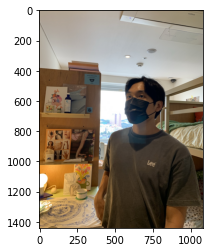

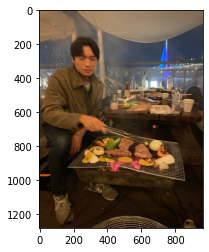

In [2]:
# os 모듈에 있는 getenv() 함수를 이용하여 읽고싶은 파일의 경로를 file_path에 저장
# 준비한 이미지 파일의 경로를 이용하여, 이미지 파일을 읽음
# cv2.imread(경로): 경로에 해당하는 이미지 파일을 읽어서 변수에 저장
img_path_cats = os.getenv('HOME')+'/aiffel/human_segmentation/images/cats.jpg'
img_path_me1 = os.getenv('HOME')+'/aiffel/human_segmentation/images/me1.jpg'
img_path_me2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/me2.jpg'

img_orig_cats = cv2.imread(img_path_cats)
img_orig_me1 = cv2.imread(img_path_me1)
img_orig_me2 = cv2.imread(img_path_me2)

print(img_orig_cats.shape, img_orig_me1.shape, img_orig_me2.shape)

# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
plt.imshow(cv2.cvtColor(img_orig_cats, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig_me1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig_me2, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f38229561c0>)

In [4]:
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 훈련된 예외 모델(model_file)을 로드하는 함수를 호출

In [5]:
segvalues_me1, output_me1 = model.segmentAsPascalvoc(img_path_me1) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용

In [6]:
segvalues_me2, output_me2 = model.segmentAsPascalvoc(img_path_me2) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용

In [7]:
segvalues_cats, output_cats = model.segmentAsPascalvoc(img_path_cats) # segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용

In [8]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

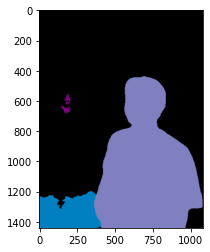

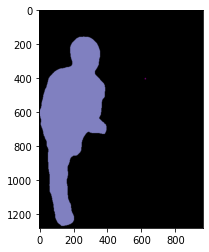

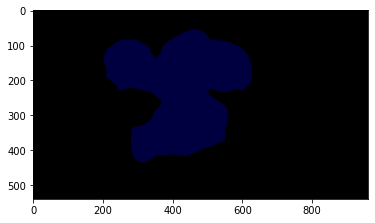

In [9]:
#segmentAsPascalvoc() 함수 를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 output을 matplotlib을 이용해 출력
plt.imshow(output_me1)
plt.show()
plt.imshow(output_me2)
plt.show()
plt.imshow(output_cats)
plt.show()

In [10]:
segvalues_me1 # segmentAsPascalvoc() 함수를 호출하여 입력된 이미지를 분할한 뒤 나온 결과값 중 배열값을 출력

{'class_ids': array([ 0,  5, 11, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]])}

In [11]:
segvalues_me2

{'class_ids': array([ 0,  5, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [12]:
segvalues_cats

{'class_ids': array([0, 8]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [13]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues_me1['class_ids']:
    print(LABEL_NAMES[class_id])

background
bottle
diningtable
person


In [14]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues_me2['class_ids']:
    print(LABEL_NAMES[class_id])

background
bottle
person


In [15]:
#segvalues에 있는 class_ids를 담겨있는 값을 통해 pacalvoc에 담겨있는 라벨을 출력
for class_id in segvalues_cats['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat


In [16]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!

#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [17]:
colormap[15] #컬러맵 15에 해당하는 배열 출력 (pacalvoc에 LABEL_NAMES 15번째인 사람)

array([192, 128, 128])

In [18]:
colormap[8]

array([64,  0,  0])

In [19]:
seg_color_15 = (128,128,192) # 색상순서 변경 - colormap의 배열은 RGB 순이며 output의 배열은 BGR 순서로 채널 배치가 되어 있어서

In [20]:
seg_color_8 = (0,0,64)

(1440, 1080)
(1280, 960)
(540, 960)


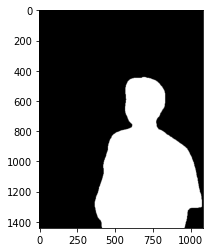

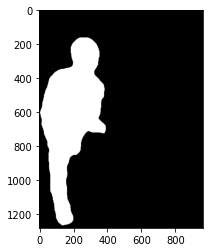

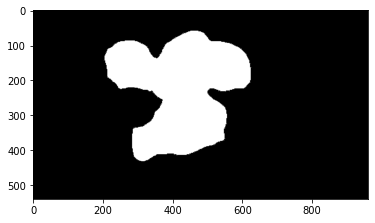

In [21]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
# seg_color 값이 person을 값이 므로 사람이 있는 위치를 제외하고는 gray로 출력
# cmap 값을 변경하면 다른 색상으로 확인이 가능함
seg_map_me1 = np.all(output_me1==seg_color_15, axis=-1)
seg_map_me2 = np.all(output_me2==seg_color_15, axis=-1) 
seg_map_cats = np.all(output_cats==seg_color_8, axis=-1) 
print(seg_map_me1.shape) 
print(seg_map_me2.shape)
print(seg_map_cats.shape)
plt.imshow(seg_map_me1, cmap='gray')
plt.show()
plt.imshow(seg_map_me2, cmap='gray')
plt.show()
plt.imshow(seg_map_cats, cmap='gray')
plt.show()

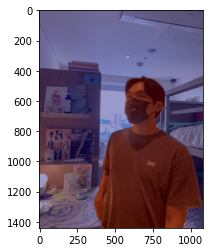

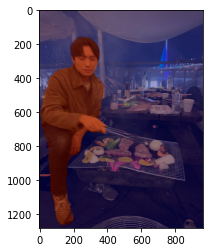

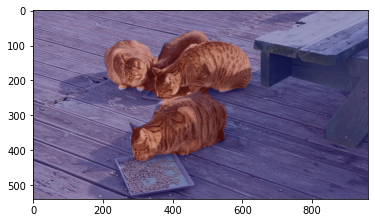

In [23]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show_me1 = img_orig_me1.copy()
img_show_me2 = img_orig_me2.copy()
img_show_cats = img_orig_cats.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask_me1 = seg_map_me1.astype(np.uint8) * 255
img_mask_me2 = seg_map_me2.astype(np.uint8) * 255
img_mask_cats = seg_map_cats.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask_me1 = cv2.applyColorMap(img_mask_me1, cv2.COLORMAP_JET)
color_mask_me2 = cv2.applyColorMap(img_mask_me2, cv2.COLORMAP_JET)
color_mask_cats = cv2.applyColorMap(img_mask_cats, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show_me1 = cv2.addWeighted(img_show_me1, 0.6, color_mask_me1, 0.4, 0.0)
img_show_me2 = cv2.addWeighted(img_show_me2, 0.6, color_mask_me2, 0.4, 0.0)
img_show_cats = cv2.addWeighted(img_show_cats, 0.6, color_mask_cats, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show_me1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_show_me2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_show_cats, cv2.COLOR_BGR2RGB))
plt.show()

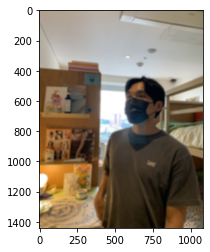

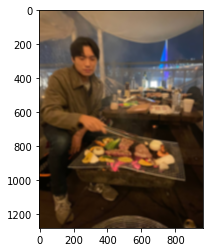

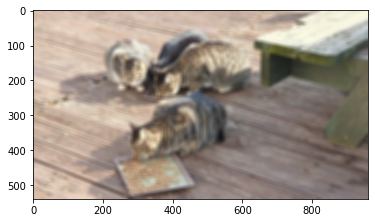

In [24]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur_me1 = cv2.blur(img_orig_me1, (13,13))
img_orig_blur_me2 = cv2.blur(img_orig_me2, (13,13))
img_orig_blur_cats = cv2.blur(img_orig_cats, (13,13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur_me1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig_blur_me2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_orig_blur_cats, cv2.COLOR_BGR2RGB))
plt.show()

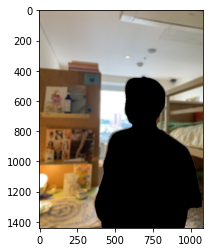

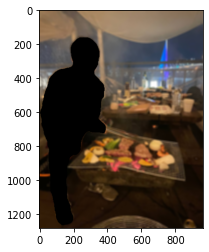

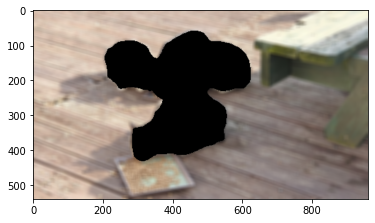

In [25]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color_me1 = cv2.cvtColor(img_mask_me1, cv2.COLOR_GRAY2BGR)
img_mask_color_me2 = cv2.cvtColor(img_mask_me2, cv2.COLOR_GRAY2BGR)
img_mask_color_cats = cv2.cvtColor(img_mask_cats, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask_me1 = cv2.bitwise_not(img_mask_color_me1)
img_bg_mask_me2 = cv2.bitwise_not(img_mask_color_me2)
img_bg_mask_cats = cv2.bitwise_not(img_mask_color_cats)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur_me1 = cv2.bitwise_and(img_orig_blur_me1, img_bg_mask_me1)
img_bg_blur_me2 = cv2.bitwise_and(img_orig_blur_me2, img_bg_mask_me2)
img_bg_blur_cats = cv2.bitwise_and(img_orig_blur_cats, img_bg_mask_cats)

plt.imshow(cv2.cvtColor(img_bg_blur_me1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_bg_blur_me2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_bg_blur_cats, cv2.COLOR_BGR2RGB))
plt.show()

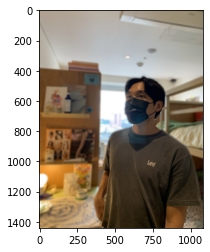

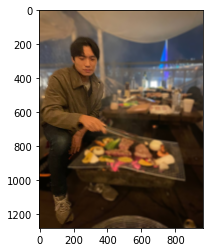

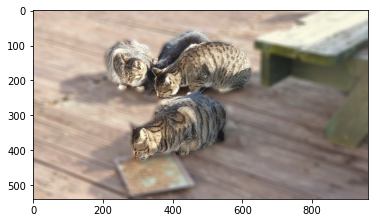

In [27]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat_me1 = np.where(img_mask_color_me1==255, img_orig_me1, img_bg_blur_me1)
img_concat_me2 = np.where(img_mask_color_me2==255, img_orig_me2, img_bg_blur_me2)
img_concat_cats = np.where(img_mask_color_cats==255, img_orig_cats, img_bg_blur_cats)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat_me1, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_concat_me2, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_concat_cats, cv2.COLOR_BGR2RGB))
plt.show()

In [29]:
cv2.imwrite("img_me1_new.jpg", img_concat_me1)
cv2.imwrite("img_me2_new.jpg", img_concat_me2)
cv2.imwrite("img_cats_new.jpg", img_concat_cats)

True

(1472, 3010, 3)
(1440, 1080, 3)


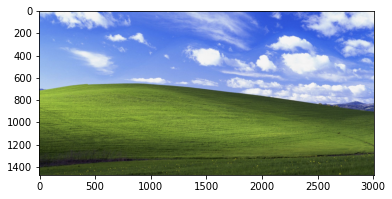

<function matplotlib.pyplot.show(close=None, block=None)>

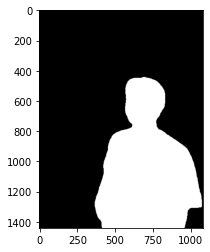

In [35]:
# Load other BG
img_path_WinBG = os.getenv('HOME')+'/aiffel/human_segmentation/images/WinBG.png'
img_orig_WinBG = cv2.imread(img_path_WinBG)
print(img_orig_WinBG.shape)
print(img_mask_color_me1.shape)
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 이미지 색상 채널을 변경 (BGR 형식을 RGB 형식으로 변경)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시, 입력은 RGB(A) 데이터 혹은 2D 스칼라 데이터
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
# plt.show(): 현재 열려있는 모든 figure를 표시 (여기서 figure는 이미지, 그래프 등)
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html
plt.imshow(cv2.cvtColor(img_orig_WinBG, cv2.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv2.cvtColor(img_mask_color_me1, cv2.COLOR_BGR2RGB))
plt.show

In [42]:
img_orig_me1_size = img_orig_me1.copy()

1440 1080 3


True

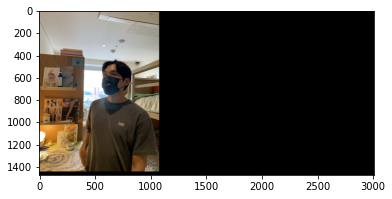

In [56]:
# Create a new image with the same shape but filled with zeros (black background)
img_zero = np.zeros_like(img_orig_WinBG)
h, w, c = img_orig_me1_size.shape
print(h,w,c)
# Insert img_orig_me1_resize into new_img at a specific position (e.g., top-left corner)
img_zero[0:h, 0:w, :] = img_orig_me1_size
plt.imshow(cv2.cvtColor(img_zero, cv2.COLOR_BGR2RGB))
plt.show
cv2.imwrite("img_zero.jpg", img_zero)

In [58]:
img_path_size = os.getenv('HOME')+'/aiffel/human_segmentation/img_zero.jpg'

In [69]:
segvalues_size, output_size = model.segmentAsPascalvoc(img_path_size)
# segmentAsPascalvoc()함 수 를 호출 하여 입력된 이미지를 분할, 분할 출력의 배열을 가져옴, 분할 은 pacalvoc 데이터로 학습된 모델을 이용
img_orig_size = cv2.imread(img_path_size)

background
diningtable
person


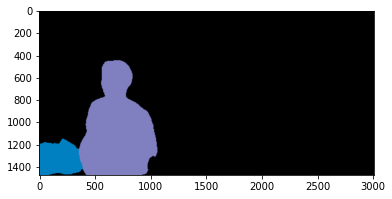

In [70]:
plt.imshow(output_size)
for class_id in segvalues_size['class_ids']:
    print(LABEL_NAMES[class_id])

(1472, 3010)


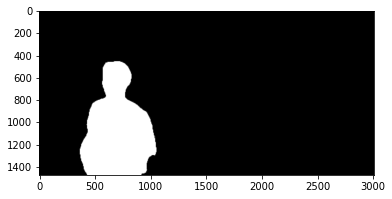

In [71]:
seg_map_size = np.all(output_size==seg_color_15, axis=-1) 
print(seg_map_size.shape)
plt.imshow(seg_map_size, cmap='gray')
plt.show()

In [73]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show_size = img_orig_size.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask_size = seg_map_size.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask_size = cv2.applyColorMap(img_mask_size, cv2.COLORMAP_JET)

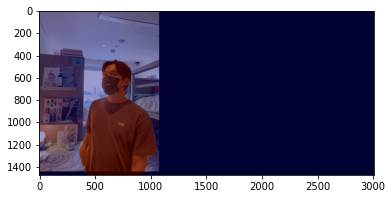

In [74]:
# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show_size = cv2.addWeighted(img_show_size, 0.6, color_mask_size, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show_size, cv2.COLOR_BGR2RGB))
plt.show()

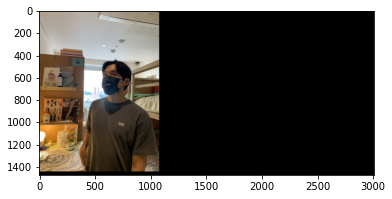

In [75]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur_size = cv2.blur(img_orig_size, (13,13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_size, cv2.COLOR_BGR2RGB))
plt.show()

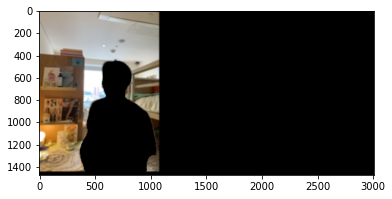

In [76]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color_size = cv2.cvtColor(img_mask_size, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask_size = cv2.bitwise_not(img_mask_color_size)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur_size = cv2.bitwise_and(img_orig_blur_size, img_bg_mask_size)

plt.imshow(cv2.cvtColor(img_bg_blur_size, cv2.COLOR_BGR2RGB))
plt.show()

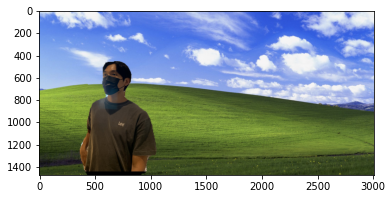

In [77]:
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat_WinBG = np.where(img_mask_color_size==255, img_orig_size, img_orig_WinBG)


# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat_WinBG, cv2.COLOR_BGR2RGB))
plt.show()

In [78]:
cv2.imwrite("img_new_BG.jpg", img_concat_WinBG)

True